In [1]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import numpy as np


In [2]:
class CustomDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data.iloc[idx, 1:].values.astype(np.uint8).reshape((28, 28))
        label = self.data.iloc[idx, 0]
        if self.transform:
            image = self.transform(image)
        return image, label

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = CustomDataset(csv_file='mnist_train.csv', transform=transform)
test_dataset = CustomDataset(csv_file='mnist_test.csv', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 32 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


Epoch 1/40, Loss: 0.1440
Epoch 2/40, Loss: 0.0705
Epoch 3/40, Loss: 0.0626
Epoch 4/40, Loss: 0.0545
Epoch 5/40, Loss: 0.0554
Epoch 6/40, Loss: 0.0562
Epoch 7/40, Loss: 0.0518
Epoch 8/40, Loss: 0.0565
Epoch 9/40, Loss: 0.0520
Epoch 10/40, Loss: 0.0445
Epoch 11/40, Loss: 0.0543
Epoch 12/40, Loss: 0.0536
Epoch 13/40, Loss: 0.0455
Epoch 14/40, Loss: 0.0439
Epoch 15/40, Loss: 0.0558
Epoch 16/40, Loss: 0.0434
Epoch 17/40, Loss: 0.0532
Epoch 18/40, Loss: 0.0440
Epoch 19/40, Loss: 0.0592
Epoch 20/40, Loss: 0.0506
Epoch 21/40, Loss: 0.0512
Epoch 22/40, Loss: 0.0445
Epoch 23/40, Loss: 0.0499
Epoch 24/40, Loss: 0.0506
Epoch 25/40, Loss: 0.0581
Epoch 26/40, Loss: 0.0495
Epoch 27/40, Loss: 0.0449
Epoch 28/40, Loss: 0.0422
Epoch 29/40, Loss: 0.0614
Epoch 30/40, Loss: 0.0448
Epoch 31/40, Loss: 0.0593
Epoch 32/40, Loss: 0.0457
Epoch 33/40, Loss: 0.0546
Epoch 34/40, Loss: 0.0569
Epoch 35/40, Loss: 0.0447
Epoch 36/40, Loss: 0.0644
Epoch 37/40, Loss: 0.0564
Epoch 38/40, Loss: 0.0593
Epoch 39/40, Loss: 0.

Epoch 1/40, Loss: 0.1840
Epoch 2/40, Loss: 0.0815
Epoch 3/40, Loss: 0.0707
Epoch 4/40, Loss: 0.0689
Epoch 5/40, Loss: 0.0662
Epoch 6/40, Loss: 0.0604
Epoch 7/40, Loss: 0.0614
Epoch 8/40, Loss: 0.0589
Epoch 9/40, Loss: 0.0535
Epoch 10/40, Loss: 0.0594
Epoch 11/40, Loss: 0.0514
Epoch 12/40, Loss: 0.0531
Epoch 13/40, Loss: 0.0558
Epoch 14/40, Loss: 0.0508
Epoch 15/40, Loss: 0.0504
Epoch 16/40, Loss: 0.0524
Epoch 17/40, Loss: 0.0521
Epoch 18/40, Loss: 0.0519
Epoch 19/40, Loss: 0.0543
Epoch 20/40, Loss: 0.0502
Epoch 21/40, Loss: 0.0501
Epoch 22/40, Loss: 0.0497
Epoch 23/40, Loss: 0.0545
Epoch 24/40, Loss: 0.0508
Epoch 25/40, Loss: 0.0490
Epoch 26/40, Loss: 0.0548
Epoch 27/40, Loss: 0.0506
Epoch 28/40, Loss: 0.0526
Epoch 29/40, Loss: 0.0525
Epoch 30/40, Loss: 0.0567
Epoch 31/40, Loss: 0.0499
Epoch 32/40, Loss: 0.0490
Epoch 33/40, Loss: 0.0501
Epoch 34/40, Loss: 0.0476
Epoch 35/40, Loss: 0.0549
Epoch 36/40, Loss: 0.0493
Epoch 37/40, Loss: 0.0475
Epoch 38/40, Loss: 0.0516
Epoch 39/40, Loss: 0.

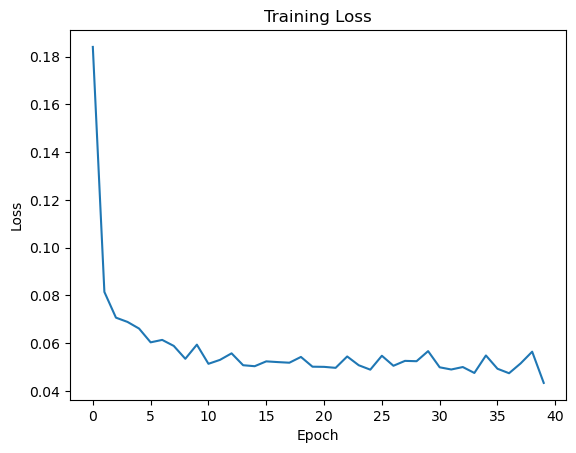

In [5]:
import matplotlib.pyplot as plt

def train(model, train_loader,criterion, optimizer, epochs=40):
    model.train()
    losses = []
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
        losses.append(epoch_loss)
    
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

# Train the model and visualize the training loss

train(model, train_loader, criterion, optimizer, epochs=40)


In [6]:
def pgd_attack(data, target, model, criterion, epsilon, alpha, num_iter):
    perturbed_data = data.clone().detach().to(device)
    target = target.to(device)
    perturbed_data.requires_grad = True
    for _ in range(num_iter):
        output = model(perturbed_data)
        loss = criterion(output, target)
        loss.backward()
        with torch.no_grad():
            perturbed_data += alpha * perturbed_data.grad.sign()
            perturbed_data = torch.min(torch.max(perturbed_data, data - epsilon), data + epsilon)
            perturbed_data = torch.clamp(perturbed_data, 0, 1)
            perturbed_data.requires_grad = True
    return perturbed_data


In [7]:
def test(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Accuracy on test set: {accuracy:.4f}")

def test_with_pgd(model, test_loader, criterion, epsilon, alpha, num_iter):
    model.eval()
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        perturbed_inputs = pgd_attack(inputs, labels, model, criterion, epsilon, alpha, num_iter)
        outputs = model(perturbed_inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Accuracy on test set with PGD attack: {accuracy:.4f}")

# Testing the model
test(model, test_loader, criterion)

# Testing the model with PGD attack
epsilon = 3/255
alpha = 8/255
num_iter = 3
test_with_pgd(model, test_loader, criterion, epsilon, alpha, num_iter)

Accuracy on test set: 0.9781
Accuracy on test set with PGD attack: 0.4488


In [45]:
epsilons = [0,0.007,0.01,0.02,0.03,0.05,0.1,0.2,0.3]  # Example list of epsilon values

for epsilon in epsilons:
    print(f"Testing with epsilon = {epsilon}:")
    test_with_pgd(model, test_loader, criterion, epsilon, alpha, num_iter)
    print()


Testing with epsilon = 0:
Accuracy on test set with PGD attack: 0.8608

Testing with epsilon = 0.007:
Accuracy on test set with PGD attack: 0.8168

Testing with epsilon = 0.01:
Accuracy on test set with PGD attack: 0.8001

Testing with epsilon = 0.02:
Accuracy on test set with PGD attack: 0.7475

Testing with epsilon = 0.03:
Accuracy on test set with PGD attack: 0.6951

Testing with epsilon = 0.05:
Accuracy on test set with PGD attack: 0.6216

Testing with epsilon = 0.1:
Accuracy on test set with PGD attack: 0.5336

Testing with epsilon = 0.2:
Accuracy on test set with PGD attack: 0.5290

Testing with epsilon = 0.3:
Accuracy on test set with PGD attack: 0.5253



In [8]:
epsilons = [0,0.007,0.01,0.02,0.03,0.05,0.1,0.2,0.3]  # Example list of epsilon values
iterations = [3, 7, 10, 12]  # Example list of iteration values

for epsilon in epsilons:
    print(f"Testing with epsilon = {epsilon}:")
    for num_iter in iterations:
        print(f"  Testing with num_iter = {num_iter}:")
        test_with_pgd(model, test_loader, criterion, epsilon, alpha, num_iter)
    print()


Testing with epsilon = 0:
  Testing with num_iter = 3:
Accuracy on test set with PGD attack: 0.5291
  Testing with num_iter = 7:
Accuracy on test set with PGD attack: 0.5291
  Testing with num_iter = 10:
Accuracy on test set with PGD attack: 0.5291
  Testing with num_iter = 12:
Accuracy on test set with PGD attack: 0.5291

Testing with epsilon = 0.007:
  Testing with num_iter = 3:
Accuracy on test set with PGD attack: 0.4801
  Testing with num_iter = 7:
Accuracy on test set with PGD attack: 0.4799
  Testing with num_iter = 10:
Accuracy on test set with PGD attack: 0.4793
  Testing with num_iter = 12:
Accuracy on test set with PGD attack: 0.4792

Testing with epsilon = 0.01:
  Testing with num_iter = 3:
Accuracy on test set with PGD attack: 0.4609
  Testing with num_iter = 7:
Accuracy on test set with PGD attack: 0.4599
  Testing with num_iter = 10:
Accuracy on test set with PGD attack: 0.4583
  Testing with num_iter = 12:
Accuracy on test set with PGD attack: 0.4584

Testing with epsil

In [9]:
def adversarial_training(model, device, train_loader, optimizer, criterion, epsilon, alpha, num_iter):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Generate adversarial examples using PGD
        perturbed_inputs = pgd_attack(inputs, labels, model, criterion, epsilon, alpha, num_iter)

        # Add adversarial examples to the training dataset
        augmented_inputs = torch.cat((inputs, perturbed_inputs), dim=0)
        augmented_labels = torch.cat((labels, labels), dim=0)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(augmented_inputs)

        # Calculate loss
        loss = criterion(outputs, augmented_labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

In [10]:
def test(model, device, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy


In [11]:
num_epochs = 10
for epoch in range(num_epochs):
    adversarial_training(model, device, train_loader, optimizer, criterion, epsilon, alpha, num_iter)
    # Evaluate the model's accuracy on test set
    accuracy = test(model, device, test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Test Accuracy: {accuracy:.4f}")

Epoch 1/10, Test Accuracy: 0.9814
Epoch 2/10, Test Accuracy: 0.9825
Epoch 3/10, Test Accuracy: 0.9785
Epoch 4/10, Test Accuracy: 0.9806
Epoch 5/10, Test Accuracy: 0.9761
Epoch 6/10, Test Accuracy: 0.9820
Epoch 7/10, Test Accuracy: 0.9805
Epoch 8/10, Test Accuracy: 0.9788
Epoch 9/10, Test Accuracy: 0.9808
Epoch 10/10, Test Accuracy: 0.9785


In [12]:
num_epochs = 10
epsilons = [0, 0.007, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3]  # Example list of epsilon values
iterations = [3, 7, 10, 12]  # Example list of iteration values

for epsilon in epsilons:
    for num_iter in iterations:
        print(f"Testing with epsilon = {epsilon}, num_iter = {num_iter}:")
        adversarial_training(model, device, train_loader, optimizer, criterion, epsilon, alpha, num_iter)
        # Evaluate the model's accuracy on test set after adversarial training
        accuracy = test(model, device, test_loader)
        print(f"  Test Accuracy after adversarial training: {accuracy:.4f}")


Testing with epsilon = 0, num_iter = 3:
  Test Accuracy after adversarial training: 0.9805
Testing with epsilon = 0, num_iter = 7:
  Test Accuracy after adversarial training: 0.9844
Testing with epsilon = 0, num_iter = 10:
  Test Accuracy after adversarial training: 0.9834
Testing with epsilon = 0, num_iter = 12:
  Test Accuracy after adversarial training: 0.9815
Testing with epsilon = 0.007, num_iter = 3:
  Test Accuracy after adversarial training: 0.9819
Testing with epsilon = 0.007, num_iter = 7:
  Test Accuracy after adversarial training: 0.9811
Testing with epsilon = 0.007, num_iter = 10:
  Test Accuracy after adversarial training: 0.9836
Testing with epsilon = 0.007, num_iter = 12:
  Test Accuracy after adversarial training: 0.9846
Testing with epsilon = 0.01, num_iter = 3:
  Test Accuracy after adversarial training: 0.9793
Testing with epsilon = 0.01, num_iter = 7:
  Test Accuracy after adversarial training: 0.9837
Testing with epsilon = 0.01, num_iter = 10:
  Test Accuracy afte

In [1]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout1(x)
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [2]:
modelF = Net().to(device)  # Use appropriate architecture for the teacher model
optimizerF = torch.optim.Adam(modelF.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

NameError: name 'device' is not defined

In [17]:
train(modelF, train_loader, criterion, optimizerF, epochs=40)

Epoch 1/5, Loss: 0.2104
Epoch 2/5, Loss: 0.1489
Epoch 3/5, Loss: 0.1440
Epoch 4/5, Loss: 0.1524
Epoch 5/5, Loss: 0.1597


In [18]:
for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    soft_labels = F.log_softmax(modelF(inputs), dim=1)
    labels = soft_labels  

In [19]:
modelF1 = Net().to(device)  # Use the same architecture as the teacher model
optimizerF1 = torch.optim.Adam(modelF1.parameters(), lr=0.001)

In [20]:
train(modelF1, train_loader, criterion, optimizerF1, epochs=5)

Epoch 1/5, Loss: 0.2095
Epoch 2/5, Loss: 0.1364
Epoch 3/5, Loss: 0.1391
Epoch 4/5, Loss: 0.1517
Epoch 5/5, Loss: 0.1644


In [25]:
def test_with_pgd1(model, test_loader, criterion, epsilon, alpha, num_iter):
    model.eval()
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        perturbed_inputs = pgd_attack(inputs, labels, model, criterion, epsilon, alpha, num_iter)
        outputs = model(perturbed_inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy  # Return accuracy instead of printing it directly

# Test Student Model with PGD Attack
epsilon = 3/255
alpha = 8/255
num_iter = 3
accuracy_after_defense = test_with_pgd1(modelF1, test_loader, criterion, epsilon, alpha, num_iter)

# Print the accuracy after defense
print(f"Accuracy on test set after distillation defense: {accuracy_after_defense:.4f}")


Accuracy on test set after distillation defense: 0.3457
